In [132]:
import os
import glob
import pickle 

import numpy as np

%matplotlib inline 

import matplotlib.pyplot as plt

In [133]:
fin = open('../../../results/Data_09042020/shawllo_fnn/shallow_fnn_act_relu_stride_1_window_100_inpQuants_voltage_d,voltage_q,current_d,current_q_outQuants_speed,torque_lr_0.01_batchSize_20000_epochs_1000_loss_mse.pkl', 'rb')
# fin = open('../../../results/Data_09042020/encdec_diag_birnn_skip/encdec_diag_birnn_skip_act_relu_stride_1_window_100_inpQuants_voltage_d,voltage_q,current_d,current_q_outQuants_speed,torque_lr_0.01_batchSize_10000_epochs_1000_loss_mse.pkl', 'rb')
model_data = pickle.load(fin)
fin.close()

fin = open('../../../datasets/Data_09042020/benchmark/0to50speed_0torque.pkl', 'rb')
input_data = pickle.load(fin)
fin.close()


In [134]:
model_speed, model_torque = model_data

In [135]:
ref_speed, ref_torque = input_data['reference_speed_interp'], input_data['reference_torque_interp']
sim_speed, sim_torque = input_data['speed'], input_data['torque']
time = input_data['time']

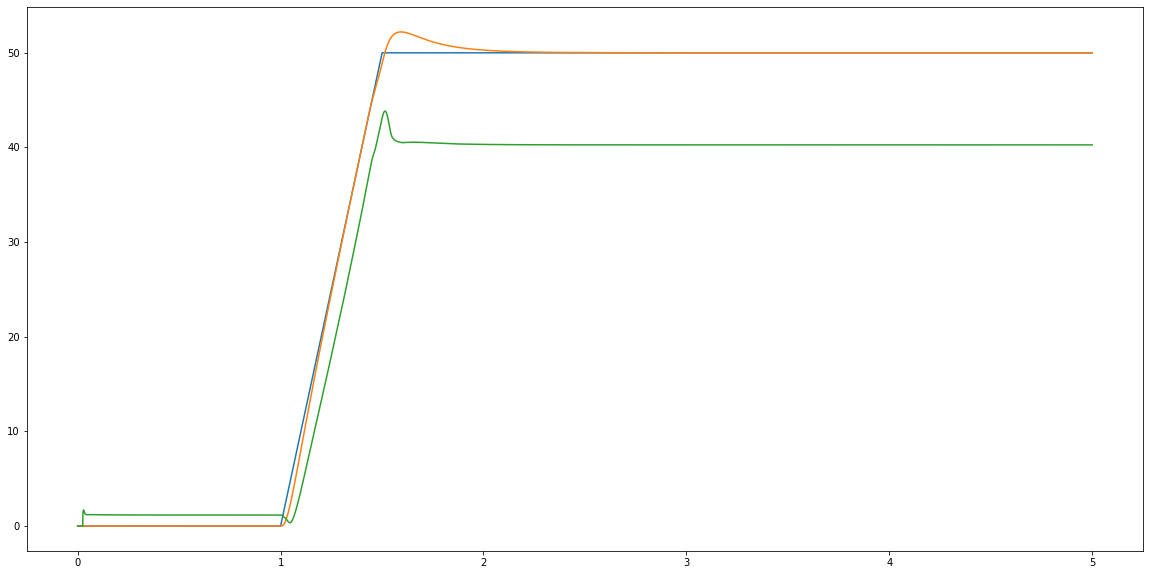

In [136]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(time, ref_speed)
plt.plot(time, sim_speed)
plt.plot(time, model_speed)

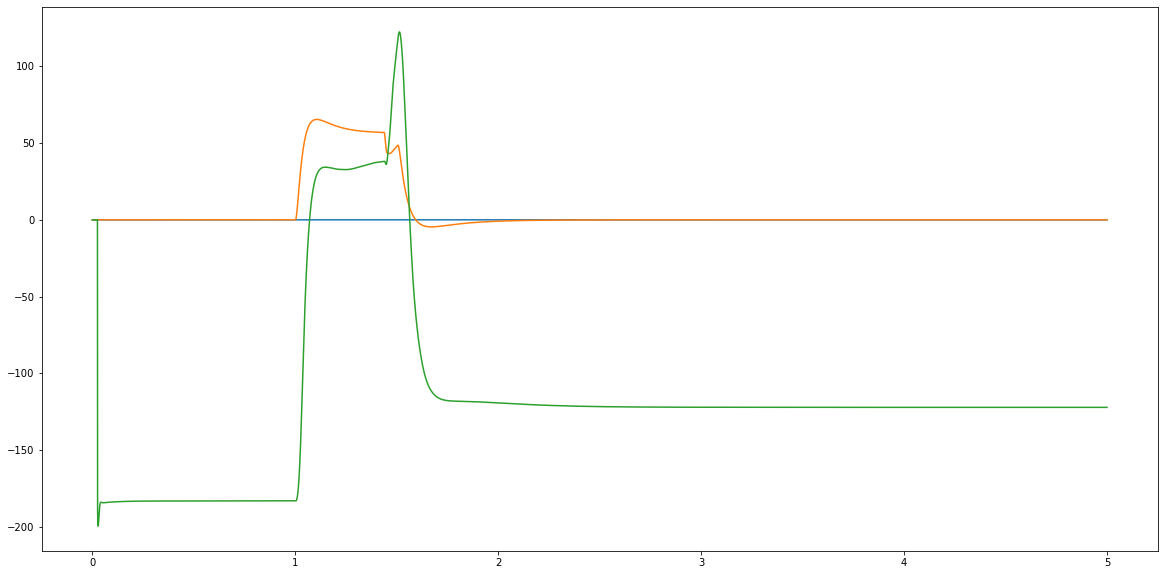

In [137]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(time, ref_torque)
plt.plot(time, sim_torque)
plt.plot(time, model_torque)

In [78]:
pkls = glob.glob('../../../datasets/Data_09042020/train/*.pkl')

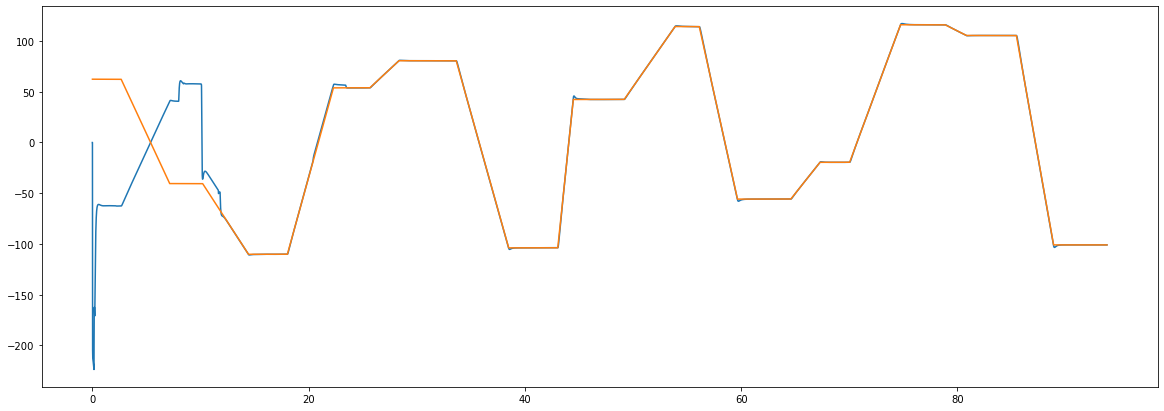

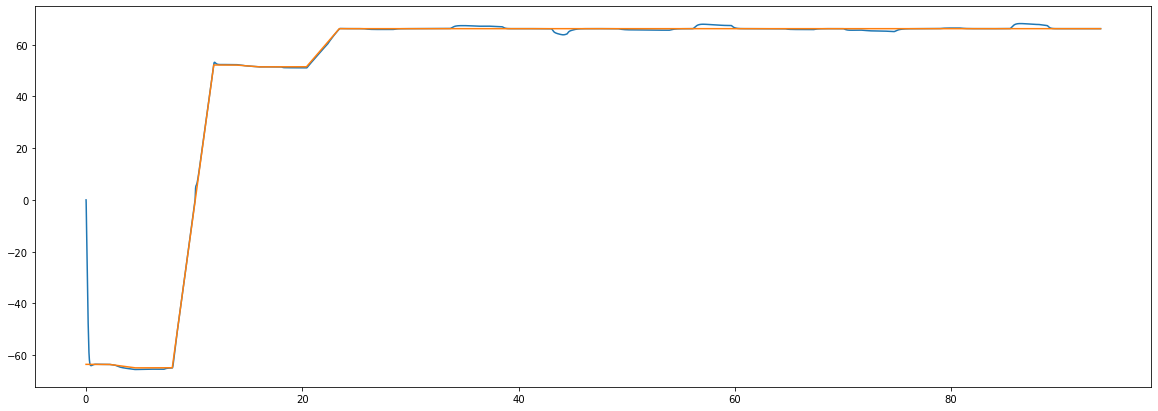

In [101]:

plt.rcParams["figure.figsize"] = (20,7)

for pkl in pkls:
    fin = open(pkl, 'rb')
    data = pickle.load(fin)
    fin.close()
    
    loc = np.argmax(data['torque'] < -200)
    plt.plot(data['time'], data['torque'], label='sim')
    plt.plot(data['time'], data['reference_torque_interp'], label='ref')
    plt.show()
    
    plt.plot(data['time'], data['speed'], label='sim')
    plt.plot(data['time'], data['reference_speed_interp'], label='ref')
    plt.show()
    break

In [108]:
torques = []
speeds = []
current_d = []
current_q = []
voltage_d = []
voltage_q = []

for pkl in pkls:
    fin = open(pkl, 'rb')
    data = pickle.load(fin)
    fin.close()
    
    torques += list(data['torque'])
    speeds += list(data['speed'])
    current_d += list(data['current_d'])
    current_q += list(data['current_q'])
    voltage_d += list(data['voltage_d'])
    voltage_q += list(data['voltage_q'])

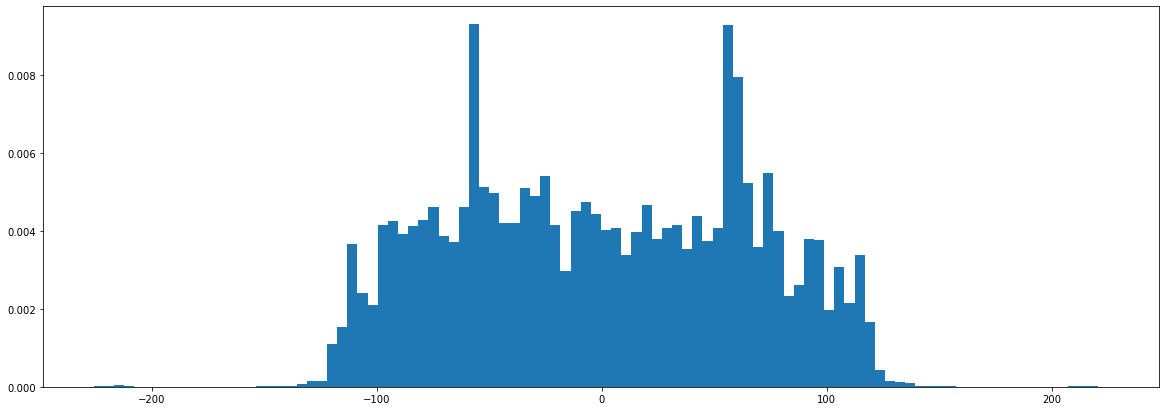

In [113]:
hist_torque = plt.hist(torques, density=True, bins=100)

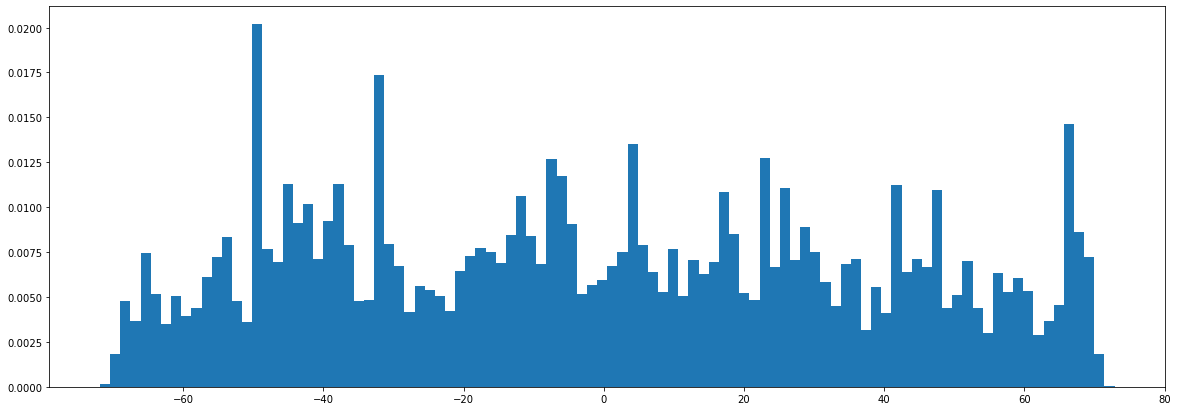

In [114]:
hist_speed = plt.hist(speeds, density=True, bins=100)

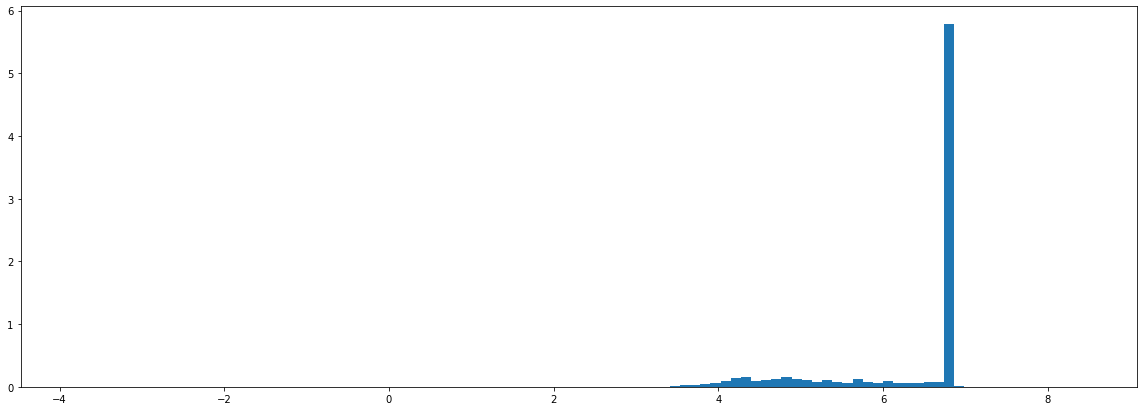

In [115]:
hist_current_d = plt.hist(current_d, density=True, bins=100)

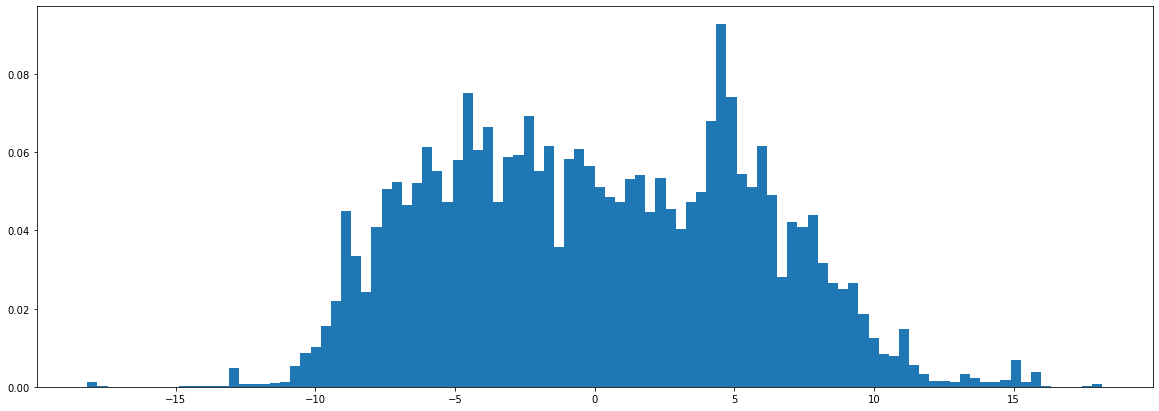

In [116]:
hist_current_q = plt.hist(current_q, density=True, bins=100)

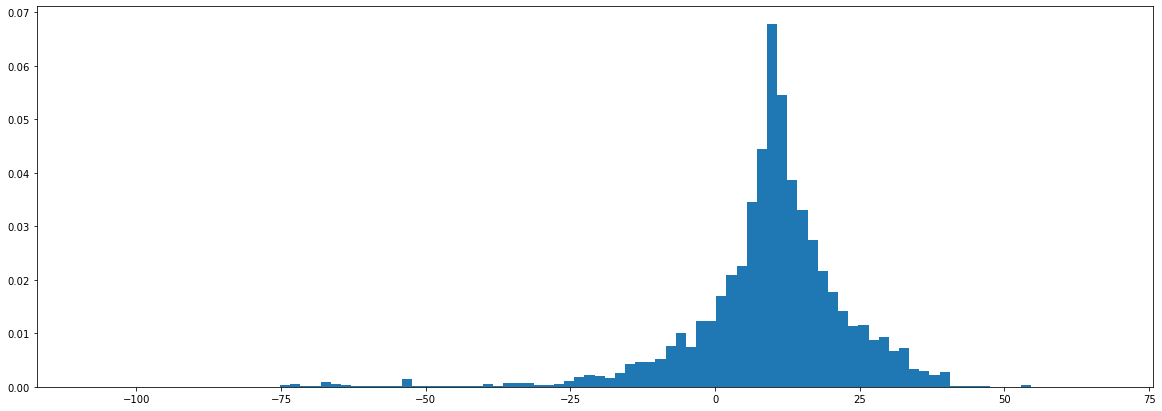

In [118]:
hist_voltage_d = plt.hist(voltage_d, density=True, bins=100)

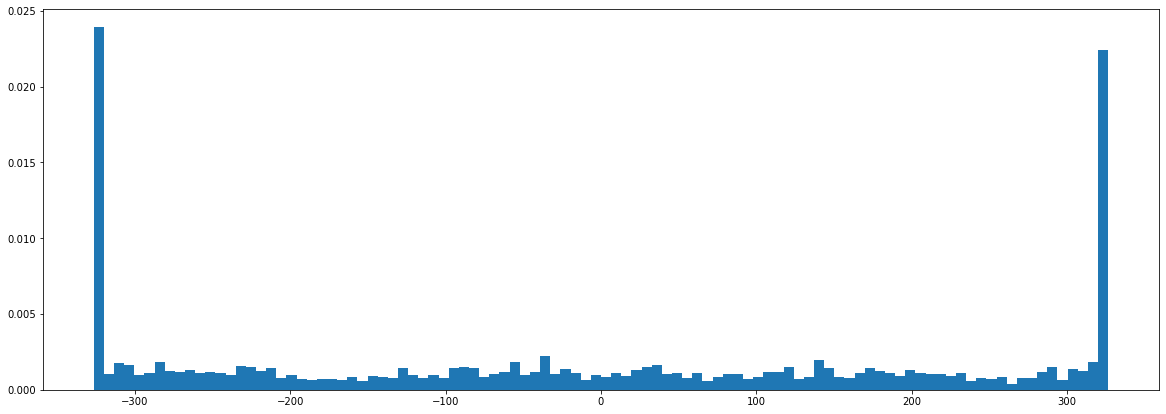

In [119]:
hist_voltage_q = plt.hist(voltage_q, density=True, bins=100)